In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import shuffle

---
# **Gaussian Naive Bayes**

In [2]:
class GaussianNB:
    def __init__(self):
        self.mean = None
        self.var = None
        self.prior = None
        self.classes = None
        self.n_classes = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)

        self.mean = np.zeros((self.n_classes, n_features), dtype = np.float64)
        self.var = np.zeros((self.n_classes, n_features), dtype=np.float64)
        self.prior = np.zeros(self.n_classes, dtype=np.float64)

        for cls_idx, cls in enumerate(self.classes):
            X_cls = X[y==cls]
            self.mean[cls_idx,:] = np.mean(X_cls, axis = 0)
            self.var[cls_idx,:] = np.var(X_cls, axis = 0)
            self.prior[cls_idx] = len(X_cls)/n_samples

        return
    
    def predict(self, X):
        return [self._predict(x) for x in X]

    
    def _predict(self, x):
        
        pdf_numerator = np.exp(-((x-self.mean)**2)/(2*self.var))
        pdf_denominator = np.sqrt(2*np.pi*self.var)
        pdf = pdf_numerator/pdf_denominator

        log_lik = np.sum(np.log(pdf), axis=1)
        posterior = log_lik + np.log(self.prior)

        return self.classes[np.argmax(posterior)]

---
# **Code Usage**

In [3]:
def dataloader():

    df = pd.read_csv('../data/cancer_detection.csv')
    df.drop(columns=df.columns[[0, -1]], inplace=True)   #  Dropping non-informative columns
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})   # Malignant -> 1, Benign -> -1

    return df

def preprocessor(df):
    y = df['diagnosis'].to_numpy()
    X = df.drop(['diagnosis'], axis=1).to_numpy()

    X = scaler().fit_transform(X)
    X, y = shuffle(X,y, random_state=42)

    return X, y

In [4]:
# Loading dataset
X, y = preprocessor(dataloader())

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

train_X, test_X, train_y , test_y = tts(X, y, random_state=42)

print("Number of examples in training set:", train_X.shape[0])
print("Number of examples in test set:", test_X.shape[0])


Feature Shape: (569, 30)
Target Shape: (569,)
Number of examples in training set: 426
Number of examples in test set: 143


In [5]:
cls = GaussianNB()
cls.fit(train_X, train_y)

# Perfomance on training set

train_pred = cls.predict(train_X)

print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       268
           1       0.95      0.93      0.94       158

    accuracy                           0.96       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



<ipython-input-2-a6dc49ccf772>:36: RuntimeWarning: divide by zero encountered in log
  log_lik = np.sum(np.log(pdf), axis=1)


In [6]:
# Performance on test set
test_pred = cls.predict(test_X)

print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        89
           1       0.95      0.78      0.86        54

    accuracy                           0.90       143
   macro avg       0.92      0.88      0.89       143
weighted avg       0.91      0.90      0.90       143



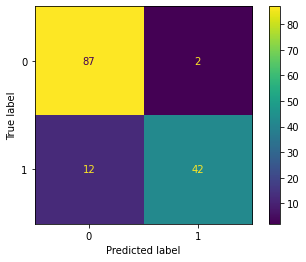

In [7]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, test_pred), display_labels=[0,1]).plot();